<a href="https://colab.research.google.com/github/hayden-huynh/Rotten-Tomatoes-Review-Classifier/blob/master/RT_Reviews_NaiveBayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Process

1. Download the Rotten Tomatoes Reviews [dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/rotten-tomatoes-reviews)
2. Text data pre-processing:
  - Lower-casing
  - Punctuation removal
  - Tokenization
  - Stopword removal
3. Split the original dataset into smaller *train* (70%), *dev* (10%), and *test* (20%) datasets
4. Train the classifier using *train* dataset
  - Calculate and store P(fresh) and P(rotten) priors
  - Calculate and store occurences of words
  - Calculate and store likelihoods of words
5. Improve the classifier using *dev* dataset
  - Smoothing
  - Float Probability vs Log Probability
  - Stopword optimization
6. Test accuracy of the classifier using *test* dataset 

# Note about Referencing

- Code lines which are not originally my own codes are wrapped around its reference
- Code lines which are not wrapped by any references are my own codes
- References are comments added at the top of the code blocks

# Download Dataset from Kaggle

In [1]:
# Download the Rotten Tomatoes Reviews dataset from Kaggle
# Reference 1 (Ref 1): https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

# Ref 1 starts =====
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ulrikthygepedersen/rotten-tomatoes-reviews
! unzip rotten-tomatoes-reviews.zip
# ===== Ref 1 ends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 68% 18.0M/26.5M [00:00<00:00, 85.8MB/s]
100% 26.5M/26.5M [00:00<00:00, 91.3MB/s]
Archive:  rotten-tomatoes-reviews.zip
  inflating: rt_reviews.csv          


# Text Pre-processing

In [273]:
# Reference 2 (Ref 2): https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords

reviews = pd.read_csv("/content/rt_reviews.csv", encoding="latin-1")
nltk.download('stopwords')

print("----- Samples -----")
print(reviews.head(5))

print("\n----- Summary -----")
print(reviews.describe())

nltk_stop_words = stopwords.words('english')
stop_words = ['the','a','and','of','is','to','it','in','that','its']
stop_words += ['with','but','this','for','as','an','on','be']
stop_words += ['film','movie','not','you','at','by','from','are','has','more','like','than']
stop_words += ['one','about','his','all','if','have','so','or']
stop_words += ['story','what','into','just','up','even']
stop_words += ['i','good','films','some','out']
stop_words += ['much','was','which','who','will','can','time','their','too','only','there','doesnt','make']
stop_words += ['full','way','while','when','makes','been','characters','comedy','most','any','theres']
stop_words += ['no','life','review','director','movies','us','feels','enough','would','they','isnt']
stop_words += ['may','he','work','also','could','really','thats','action','how']
stop_words += ['very','we','drama','still','get','here','plot','do']
stop_words += ['spanish','performance','performances','might','many','nothing','two','something','should']
stop_words += ['her','your','made','cant','them','off','does','first','never','little']
stop_words += ['½ï','both','see','seems','being','through','script','over','dont']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


----- Samples -----
  Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...

----- Summary -----
       Freshness                    Review
count     480000                    480000
unique         2                    339697
top        fresh   Parental Content Review
freq      240000                       166


In [274]:
# Lower-case all words
# Ref 2 starts =====
reviews["Review"] = reviews["Review"].apply(lambda r: r.lower())
# ===== Ref 2 ends

# Remove Punctuations
# Ref 2 starts =====
def remove_punctuations_1(text):
  punc_free = "".join([char for char in text if char not in string.punctuation])
  return punc_free
# ===== Ref 2 ends

def remove_punctuations_2(words):
  for i, w in enumerate(words):
    # Ref 2 starts =====
    punc_free = "".join([char for char in w if char not in string.punctuation])
    words[i] = punc_free
    # ===== Ref 2 ends
  return words

# Ref 2 starts =====
reviews["Review_tokens"] = reviews["Review"].apply(lambda r: remove_punctuations_1(r))
# ===== Ref 2 ends

# Tokenizing and Removing Duplicate Words
# Ref 2 starts =====
def tokenize(text):
  tokens = re.split("\W+", text)
# ===== Ref 2 ends
  tokens = list(filter(None, tokens))
  return sorted(list(set(tokens)))

# Ref 2 starts =====
reviews["Review_tokens"] = reviews["Review_tokens"].apply(lambda r: tokenize(r))
# ===== Ref 2 ends

# Remove stopwords
# Ref 2 starts =====
def remove_stopwords(words):
  output = [w for w in words if w not in stop_words]
  return output
# ===== Ref 2 ends

# Ref 2 starts =====
# reviews["Review_tokens"] = reviews["Review_tokens"].apply(lambda words: remove_stopwords(words))
# ===== Ref 2 ends

reviews.sample(5)

,Freshness,Review,Review_tokens
475005,fresh,as a child who loathed the wholesomeness of d...,"[a, and, antics, as, bugs, bunny, child, coyot..."
236265,fresh,this is the rare film that can be enormously ...,"[a, also, be, but, can, difference, enormously..."
151081,rotten,"like a bad sitcom, it wants to make you smile...","[a, and, at, bad, but, grimace, heartburn, hea..."
145989,rotten,none of the chapters use the unifying formal ...,"[a, advantage, and, any, by, chapters, conceit..."
380268,rotten,"the characterisation is so thin, and the plot...","[and, apart, banalities, characterisation, cru..."


# Split the Original Dataset

In [275]:
# Reference 3 (Ref 3): https://stackoverflow.com/questions/43777243/how-to-split-a-dataframe-in-pandas-in-predefined-percentages 

# Ref 3 starts =====
def split_by_fractions(df, fracs, random_state=0):
    remain = df.index.copy().to_frame()
    res = []
    for i in range(len(fracs)):
        fractions_sum = sum(fracs[i:])
        frac = fracs[i]/fractions_sum
        idxs = remain.sample(frac=frac, random_state=random_state).index
        remain=remain.drop(idxs)
        res.append(idxs)
    return [df.loc[idxs] for idxs in res]
# ===== Ref 3 ends

random_state = 1
train, dev, test = split_by_fractions(reviews, [0.7, 0.1, 0.2], random_state)
print(train.shape, dev.shape, test.shape)

(336000, 3) (48000, 3) (96000, 3)


# Training

In [276]:
from decimal import Decimal

train_fresh = train.loc[train["Freshness"] == "fresh"]
train_rotten = train.loc[train["Freshness"] == "rotten"]

# P(fresh) and P(rotten) priors
p_fresh = Decimal(len(train_fresh) / len(train))
p_rotten = Decimal(len(train_rotten) / len(train))

print(f'P(fresh) = {p_fresh}')
print(f'P(rotten) = {p_rotten}')

P(fresh) = 0.50085119047619042209618100969237275421619415283203125
P(rotten) = 0.499148809523809522392667759049800224602222442626953125


In [277]:
# Count word occurences
occ_fresh = {}
occ_rotten = {}

for words in train_fresh.loc[:,"Review_tokens"]:
  for w in words:
    if w not in occ_fresh.keys():
      occ_fresh[w] = 1
    else:
      occ_fresh[w] += 1

for words in train_rotten.loc[:,"Review_tokens"]:
  for w in words:
    if w not in occ_rotten.keys():
      occ_rotten[w] = 1
    else:
      occ_rotten[w] += 1

In [278]:
# Reference 4 (Ref 4): https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

# Calculate word probabilities given fresh or rotten
probs_fresh = {}
probs_rotten = {}

def calc_word_likelihood(count, alpha, h):
  if h == "fresh":
    return Decimal((count + alpha) / (len(train_fresh) + alpha * len(occ_fresh)))
  elif h == "rotten":
    return Decimal((count + alpha) / (len(train_rotten) + alpha * len(occ_rotten)))

def calc_prob(alpha=0):
  for word, count in occ_fresh.items():
    probs_fresh[word] = calc_word_likelihood(count, alpha, "fresh")
  
  for word, count in occ_rotten.items():
    probs_rotten[word] = calc_word_likelihood(count, alpha, "rotten")

alpha = 1

calc_prob(alpha)



# Derive top 10 most influential words for each class

# Ref 4 starts =====
probs_fresh_sorted = dict(sorted(probs_fresh.items(), key=lambda item: item[1], reverse=True))
probs_rotten_sorted = dict(sorted(probs_rotten.items(), key=lambda item: item[1], reverse=True))
# ===== Ref 4 ends

print("----- Fresh Top 10 -----")
i = 0
for key, value in probs_fresh_sorted.items():
  print(f"{key}: {value}")
  i += 1
  if i == 10:
    break

print("\n----- Rotten Top 10 -----")
j = 0
for key, value in probs_rotten_sorted.items():
  print(f"{key}: {value}")
  j += 1
  if j == 10:
    break

----- Fresh Top 10 -----
the: 0.428160508541914952562734697494306601583957672119140625
a: 0.381982518871672616089796292726532556116580963134765625
and: 0.366332936034962253213365102055831812322139739990234375
of: 0.330317838696861321157172142193303443491458892822265625
is: 0.235828367103694869211238938078167848289012908935546875
to: 0.231227651966626923663028492228477261960506439208984375
in: 0.1896821613031386688508206361802876926958560943603515625
that: 0.1534763607469209478750826747273094952106475830078125
its: 0.1526499801350814367051356157389818690717220306396484375
it: 0.140385379419944389400853879124042578041553497314453125

----- Rotten Top 10 -----
the: 0.4348827402770119032737738962168805301189422607421875
a: 0.355728372636154255292950665534590370953083038330078125
of: 0.306464692335139010648248358847922645509243011474609375
and: 0.30502124622919979390900380167295224964618682861328125
to: 0.263315384864899915129399232682771980762481689453125
is: 0.2180414544746829275112531831

# Experimenting with *dev* dataset

In [279]:
import csv
import os

# Function to classify a review
def classify(review_words, alpha):
  for w in review_words:
    if w not in probs_fresh.keys():
      probs_fresh[w] = calc_word_likelihood(0, alpha, "fresh")
    if w not in probs_rotten.keys():
      probs_rotten[w] = calc_word_likelihood(0, alpha, "rotten")
  
  chance_fresh = p_fresh
  chance_rotten = p_rotten
  for w in review_words:
    chance_fresh = chance_fresh * probs_fresh[w]
    chance_rotten = chance_rotten * probs_rotten[w]
  
  if chance_fresh > chance_rotten:
    return "fresh"
  else:
    return "rotten"


# Function to classify a review, log10 applied to avoid underflowing floats
def classify_log(review_words, alpha):
  for w in review_words:
    if w not in probs_fresh.keys():
      probs_fresh[w] = calc_word_likelihood(0, alpha, "fresh")
    if w not in probs_rotten.keys():
      probs_rotten[w] = calc_word_likelihood(0, alpha, "rotten")

  chance_fresh = p_fresh.log10()
  chance_rotten = p_rotten.log10()
  for w in review_words:
    chance_fresh = chance_fresh + probs_fresh[w].log10()
    chance_rotten = chance_rotten + probs_rotten[w].log10()

  if chance_fresh > chance_rotten:
    return "fresh"
  else:
    return "rotten"


# Function to test entire dataset given
def test_accuracy(dataset, alpha, use_log=False, csv_writer=None):
  correct = 0
  
  for index, row in dataset.loc[:,["Freshness", "Review_tokens"]].iterrows():
    result = ""

    if use_log:
      result = classify_log(row["Review_tokens"], alpha)
    else:
      result = classify(row["Review_tokens"], alpha)
    
    if row["Freshness"] == result:
      correct += 1
  
  accuracy = round(correct / len(dataset) * 100, 4)

  if csv_writer != None:
    csv_writer.writerow([alpha, accuracy])
  
  print(f"Successfully classified {correct}/{len(dataset)} ({accuracy}%) correctly")



# Experiment with Smoothing

# dev_smoothing = open(f"dev_smoothing_log.csv", "a", newline='')
# dev_smoothing_writer = csv.writer(dev_smoothing)
# if (os.path.getsize(f"/content/dev_smoothing_log.csv") == 0):
#   dev_smoothing_writer.writerow(["alpha", "accuracy"])

test_accuracy(dev, alpha)
# dev_smoothing.flush()

Successfully classified 38766/48000 (80.7625%) correctly


# Final Accuracy with *test* dataset

In [280]:
test_accuracy(test, alpha)

Successfully classified 77554/96000 (80.7854%) correctly


In [281]:
test_accuracy(train, alpha)

Successfully classified 282505/336000 (84.0789%) correctly


# Experimentation Graphs

In [282]:
import matplotlib.pyplot as plt

smoothing_1 = pd.read_csv("/content/dev_smoothing_1.csv")
smoothing_2 = pd.read_csv("/content/dev_smoothing_2.csv")
smoothing_3 = pd.read_csv("/content/dev_smoothing_3.csv")
smoothing_log = pd.read_csv("/content/dev_smoothing_log.csv")

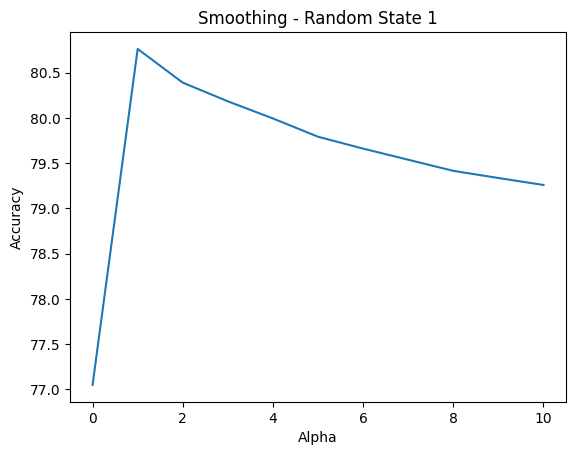

In [283]:
plt.figure()
plt.title('Smoothing - Random State 1')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(smoothing_1['alpha'], smoothing_1['accuracy'])

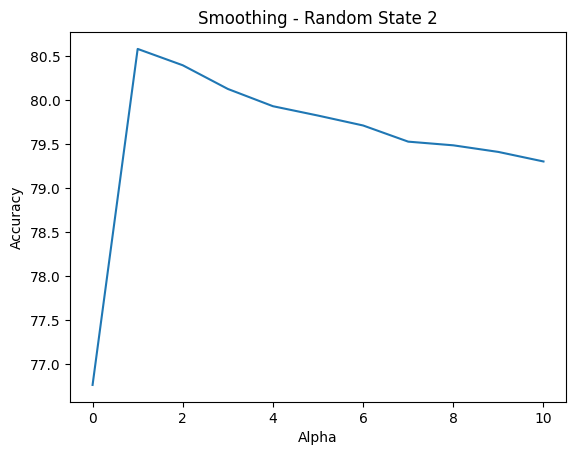

In [284]:
plt.figure()
plt.title('Smoothing - Random State 2')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(smoothing_2['alpha'], smoothing_2['accuracy'])

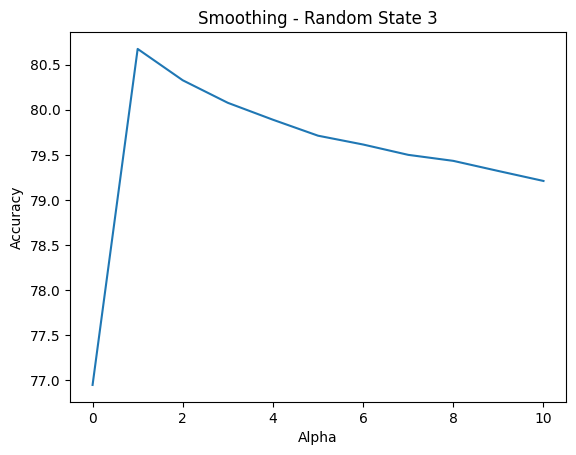

In [285]:
plt.figure()
plt.title('Smoothing - Random State 3')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(smoothing_3['alpha'], smoothing_3['accuracy'])

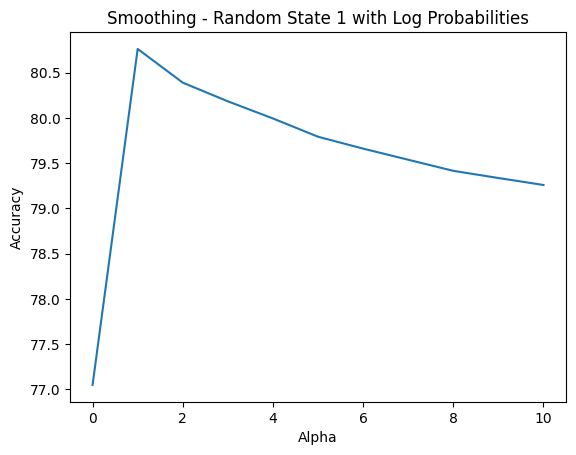

In [286]:
plt.figure()
plt.title('Smoothing - Random State 1 with Log Probabilities')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(smoothing_log['alpha'], smoothing_log['accuracy'])

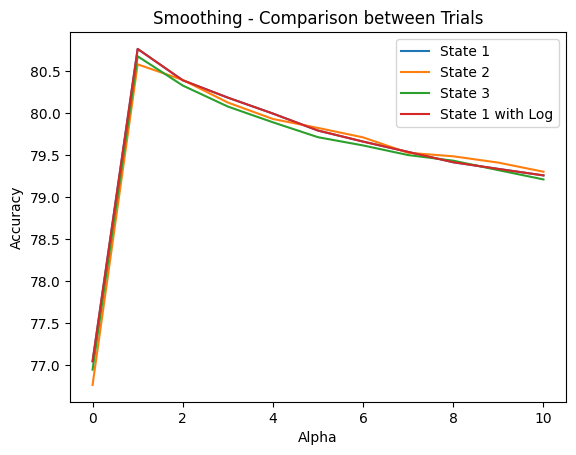

In [287]:
plt.figure()
plt.title("Smoothing - Comparison between Trials")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(smoothing_1['alpha'], smoothing_1['accuracy'], label="State 1")
plt.plot(smoothing_2['alpha'], smoothing_2['accuracy'], label="State 2")
plt.plot(smoothing_3['alpha'], smoothing_3['accuracy'], label="State 3")
plt.plot(smoothing_log['alpha'], smoothing_log['accuracy'], label="State 1 with Log")
plt.legend()

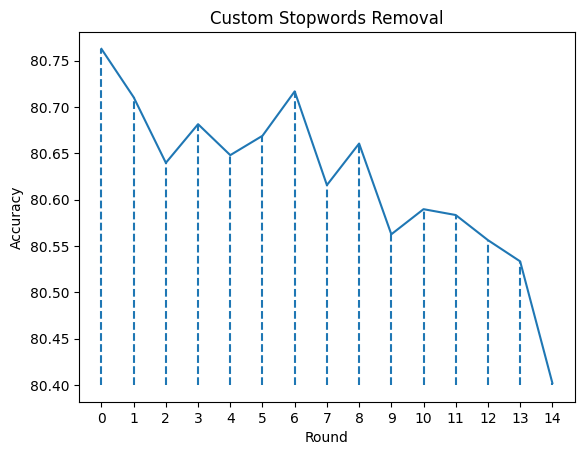

In [288]:
stopword_exp = pd.read_csv("/content/stopword_exp.csv")

plt.figure()
plt.title("Custom Stopwords Removal")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.xticks(stopword_exp['round'])
plt.vlines(stopword_exp['round'], 80.40, stopword_exp['accuracy'], linestyles="dashed")
plt.plot(stopword_exp['round'], stopword_exp['accuracy'])